# Team Zip-G-Force Data Filters
## Post processing for acceleration data

1. Import data analysis libraries
2. Import and store the data as “RAW DATA”
 - head_raw_df
 - neck_raw_df
 - shoulder_raw_df
 - heart_raw_df
 - com_raw_df
3. Run the data through an anti-aliasing filter (F2137 qualified)
4. Store the aliased data as “RAW DATA-ALIASED”
 - head_aaflt_df
 - neck_aaflt_df
 - shoulder_aaflt_df
 - heart_aaflt_df
 - com_aaflt_df
5. Run the aliased data through a post processing filter
 - The F2137 filter is a butterworth 4 pole
 - There are other options built currently (Chebyshev, elliptical) in matlab that will be run as well
6. Store the post processed data as “PROCESSED DATA”
 - head_pp_df
 - neck_pp_df
 - shoulder_pp_df
 - heart_pp_df
 - com_pp_df
7. Display post-processed data as a set of graphs
 - Show max and min STD


### Import Libraries

In [2]:
#Imports
import pandas as pd
import numpy as np
import glob, os

#Used for plotting graphs
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

#Create random data with numpy
from math import pi

In [3]:
#For debugging purposes
#Check is file path exists. In the following code, you will need to substitute the correspoding file path. 

os.path.exists('/Users/shellyginelle/Data/1 - Head/DATA-001.csv')

True

### Import Data
Every .CSV file records for 15 mins. The idea is to concatenate all .CSV files for each specific accelerometer positions then chop the sections into set of events: 
1. On Zip Line
 - Start
 - Arrival at Brake Mechanism
2. Offloading - Figure out the time it took for you to get back onto the Zip Line of choice

In [13]:
#Static Variables
colnames_HAM_IMU = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'T'] 
colnames_HAM_IMU_ALT = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'P', 'T'] 
files = glob.glob('DATA-*')

'''
1. Read all HEAD data files
'''
head_raw_dir = os.chdir("/Users/shellyginelle/Data/1 - Head/")
head_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    head_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    head_results = head_results.append(head_df)

#Save the results into a separate combined .csv
head_results.to_csv('/Users/shellyginelle/Data/1 - Head/COMBINED_HEAD_DATA.csv')

#Read combined data, rename columns and print data
head_raw_df = pd.read_csv('/Users/shellyginelle/Data/1 - Head/COMBINED_HEAD_DATA.csv', 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

'''
2. Read all NECK C7 data files
'''
neck_raw_dir = os.chdir("/Users/shellyginelle/Data/2 - Neck C7/")
neck_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    neck_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    neck_results = neck_results.append(neck_df)

#Save the results into a separate combined .csv
neck_results.to_csv('/Users/shellyginelle/Data/2 - Neck C7/COMBINED_NECK_DATA.csv')

#Read combined data, rename columns and print data
neck_raw_df = pd.read_csv("/Users/shellyginelle/Data/2 - Neck C7/COMBINED_NECK_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

'''
3. Read all SHOULDER data files
'''
shoulder_raw_dir = os.chdir("/Users/shellyginelle/Data/3 - Left Shoulder/")
shoulder_results = pd.DataFrame([], columns=colnames_HAM_IMU_ALT)

for counter, file in enumerate(files):
    shoulder_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU_ALT, engine='python')
    #Append the results into one dataframe
    shoulder_results = shoulder_results.append(shoulder_df)

#Save the results into a separate combined .csv
shoulder_results.to_csv('/Users/shellyginelle/Data/3 - Left Shoulder/COMBINED_SHOULDER_DATA.csv')

#Read combined data, rename columns and print data
shoulder_raw_df = pd.read_csv("/Users/shellyginelle/Data/3 - Left Shoulder/COMBINED_SHOULDER_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU_ALT, header=None, engine='python')

'''
4. Read all HEART data files
'''
heart_raw_dir = os.chdir("/Users/shellyginelle/Data/4 - Heart/")
heart_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    heart_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    heart_results = heart_results.append(heart_df)

#Save the results into a separate combined .csv
heart_results.to_csv('/Users/shellyginelle/Data/4 - Heart/COMBINED_HEART_DATA.csv')

#Read combined data, rename columns and print data
heart_raw_df = pd.read_csv("/Users/shellyginelle/Data/4 - Heart/COMBINED_HEART_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

'''
5. Read all COM Harness data files
'''
com_raw_dir = os.chdir("/Users/shellyginelle/Data/5 - COM Harness/")
com_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    com_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    com_results = com_results.append(com_df)

#Save the results into a separate combined .csv
com_results.to_csv('/Users/shellyginelle/Data/5 - COM Harness/COMBINED_COM_DATA.csv')

#Read combined data, rename columns and print data
com_raw_df = pd.read_csv("/Users/shellyginelle/Data/5 - COM Harness/COMBINED_COM_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, header=None, engine='python')


### Manipulate Data

In [14]:
#Divide columns Ax, Ay, Az by 2048
#Divide Gx, Gy, Gz by 65.536
acceleration_cols = ['Ax', 'Ay', 'Az']
gyroscope_cols = ['Gx', 'Gy', 'Gz']
count_g = 2048
degree_sec = 65.536


for a_cols in acceleration_cols:
    head_raw_df[a_cols] = head_raw_df[a_cols].divide(count_g)
    neck_raw_df[a_cols] = neck_raw_df[a_cols].divide(count_g)
    shoulder_raw_df[a_cols] = shoulder_raw_df[a_cols].divide(count_g)
    heart_raw_df[a_cols] = heart_raw_df[a_cols].divide(count_g)
    com_raw_df[a_cols] = com_raw_df[a_cols].divide(count_g)   

for g_cols in gyroscope_cols:
    head_raw_df[g_cols] = head_raw_df[g_cols].divide(degree_sec)
    neck_raw_df[g_cols] = neck_raw_df[g_cols].divide(degree_sec)
    shoulder_raw_df[g_cols] = shoulder_raw_df[g_cols].divide(degree_sec)
    heart_raw_df[g_cols] = heart_raw_df[g_cols].divide(degree_sec)
    com_raw_df[g_cols] = com_raw_df[g_cols].divide(degree_sec)

3.60205078125

In [83]:
head_raw_df.to_csv('/Users/shellyginelle/Data/1 - Head/MANIPULATED_HEAD_DATA.csv')
neck_raw_df.to_csv('/Users/shellyginelle/Data/2 - Neck C7/MANIPULATED_NECK_DATA.csv')
shoulder_raw_df.to_csv('/Users/shellyginelle/Data/3 - Left Shoulder/MANIPULATED_SHOULDER_DATA.csv')
heart_raw_df.to_csv('/Users/shellyginelle/Data/4 - Heart/MANIPULATED_HEART_DATA.csv')
com_raw_df.to_csv('/Users/shellyginelle/Data/5 - COM Harness/MANIPULATED_COM_DATA.csv')

In [18]:
#For debugging purposes
#head_raw_df['Ax'].max()

### Filter Data

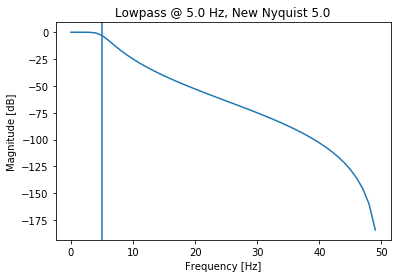

In [20]:
#TODO

from scipy import signal
import scipy.signal as sg
from matplotlib import pyplot as plt

from scipy.signal import fir_filter_design as ffd
from scipy.signal import filter_design as ifd

#Run the data through an anti-aliasing filter (F2137 qualified), save results as aliased data - aaflt
'''
head_aaflt_df
neck_aaflt_df
shoulder_aaflt_df
heart_aaflt_df
com_aaflt_df
'''

sampling_rate = 100
decimation_factor = 10
# calculate lower corner frequency (obspy.core.trace.py:1299)
low_corner = 0.5 * sampling_rate / decimation_factor

corners = 4  # obspy.signal.filter.py:104
# calculate b, a for filter obspy.signal.filter.py:120-130
nyquist = sampling_rate * 0.5
[b, a] = sg.iirfilter(corners, low_corner/nyquist, btype='lowpass', ftype='butter',
                      output='ba')
# calculate frequency response
w, h = sg.freqz(b, a, int(nyquist))
freq = w/np.pi * nyquist

new_nyquist = sampling_rate/decimation_factor*.5
plt.plot(freq, 20*np.log10(abs(h)))
plt.title('Lowpass @ %3.1f Hz, New Nyquist %3.1f' % (low_corner,
  new_nyquist))
plt.axvline(new_nyquist)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.show()

#Run the aliased data through a post processing filter (butterworth, ellip, cheby) , save results as post processed data - pp
'''
head_pp_df
neck_pp_df
shoulder_pp_df
heart_pp_df
com_pp_df
'''

# setup some of the required parameters
Fs = 1e9           # sample-rate defined in the question, down-sampled

# remez (fir) design arguements
Fpass = 10e6       # passband edge
Fstop = 11.1e6     # stopband edge, transition band 100kHz
Wp = Fpass/(Fs)    # pass normalized frequency
Ws = Fstop/(Fs)    # stop normalized frequency

# iirdesign agruements
Wip = (Fpass)/(Fs/2)
Wis = (Fstop+1e6)/(Fs/2)
Rp = 1             # passband ripple
As = 42            # stopband attenuation

# Create a FIR filter, the remez function takes a list of 
# "bands" and the amplitude for each band.
taps = 4096
br = ffd.remez(taps, [0, Wp, Ws, .5], [1,0], maxiter=10000) 

# The iirdesign takes passband, stopband, passband ripple, 
# and stop attenuation.
bc, ac = ifd.iirdesign(Wip, Wis, Rp, As, ftype='ellip')  
bb, ab = ifd.iirdesign(Wip, Wis, Rp, As, ftype='cheby2') 


### Plot Data
1. Acceleration
2. G-Force
3. Quaternion

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



TypeError: 'AxesSubplot' object is not subscriptable

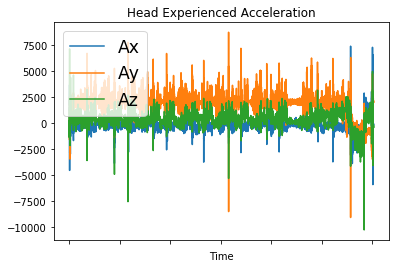

In [9]:
#For your reference, acceleration_cols = ['Ax', 'Ay', 'Az']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Acceleration',  x = 'Time', y = acceleration_cols)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Acceleration',  x = 'Time', y = acceleration_cols)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Acceleration',  x = 'Time', y = acceleration_cols)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Acceleration',  x = 'Time', y = acceleration_cols)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Acceleration',  x = 'Time', y = acceleration_cols)
com_plot.legend(loc=2, fontsize = 'xx-large')

In [47]:
#For debugging purposes
#Analyzing by chunks along the timeframe

#head_run1 = head_raw_df.iloc[74:91]
#head_run1_plot = head_run1.plot(title = 'Head Experienced Acceleration',  x = 'Time', y = acceleration)
#head_run1_plot.legend(loc=2, fontsize = 'xx-large')

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



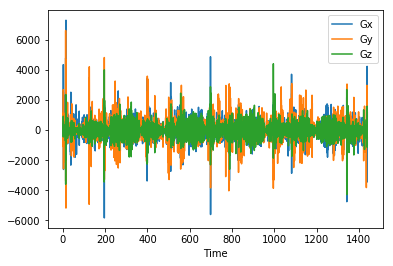

In [7]:
#For your reference, gyroscope_cols = ['Gx', 'Gy', 'Gz']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Gyroscope',  x = 'Time', y = gyroscope_cols)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Gyroscope',  x = 'Time', y = gyroscope_cols)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Gyroscope',  x = 'Time', y = gyroscope_cols)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Gyroscope',  x = 'Time', y = gyroscope_cols)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Gyroscope',  x = 'Time', y = gyroscope_cols)
com_plot.legend(loc=2, fontsize = 'xx-large')

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



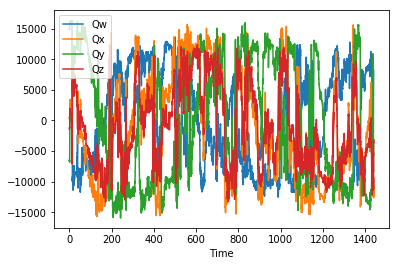

In [8]:
quarternion_cols = ['Qw', 'Qx', 'Qy', 'Qz']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Quarternion',  x = 'Time', y = quarternion_cols)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Quarternion',  x = 'Time', y = quarternion_cols)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Quarternion',  x = 'Time', y = quarternion_cols)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Quarternion',  x = 'Time', y = quarternion_cols)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Quarternion',  x = 'Time', y = quarternion_cols)
com_plot.legend(loc=2, fontsize = 'xx-large')

### Data Analysis

#### Acceleration & Gyroscope
1. MAX vs MIN experienced
2. Dependent on the MAX and MIN recorded, what was the longest duration of that acceleration experienced?

#### Quarternion
1. What was the position of the test participant? This will should be mapped to the acceleration experienced.

In [ ]:
'''
head_raw_df
neck_raw_df
shoulder_raw_df
heart_raw_df
com_raw_df
'''

#Acceleration
head_ax_max = head_raw_df['Ax'].max()
head_ax_max/2048

head_ay_max = head_raw_df['Ay'].max()
head_ay_max/2048

head_az_max = head_raw_df['Az'].max()
head_az_max/2048

head_ax_min = head_raw_df['Ax'].min()
head_ax_min/2048

head_ay_min = head_raw_df['Ay'].min()
head_ay_min/2048

head_az_min = head_raw_df['Az'].min()
head_az_min/2048

#Gyroscope
head_gx_min = head_raw_df['Gx'].min()
head_gx_min/65.536

head_gx_min = head_raw_df['Gx'].max()
head_gx_min/65.536